# Pay Analaysis Dashboard

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sqlalchemy import create_engine

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'

In [18]:
def load_data_from_db():
    df = pd.read_sql_table('pay_analysis_data', conn, index_col='emp_id')
    return df

In [19]:
# Get the data for analysis
engine = create_engine("postgresql://Joachim:@localhost/tm470")
conn = engine.connect()
people_df = load_data_from_db()
conn.close()

In [22]:
# Create additional columns
people_df['grade'] = people_df.payband_id.apply(lambda x: 'P{}'.format(x))

# Make age group to categorical to show in correct order
age_groups = ['30-39', '40-49', '50-59', '60-69']
people_df['age_group'] = people_df['age_group'].astype('category', categories=age_groups)

In [23]:
# Graph setup
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

## Workforce composition

The following table shows the current staff numbers and salary information

In [24]:
summary_df = people_df.groupby(['grade'])['salary','fte','headcount'].aggregate({
    'salary': ['min', 'max', np.mean, np.median],
    'fte': np.sum,
    'headcount': np.size
})
summary_df.round(1).style.format('{:,}')

### Gender composition by payband

In [25]:
labels = ['Female', 'Male']

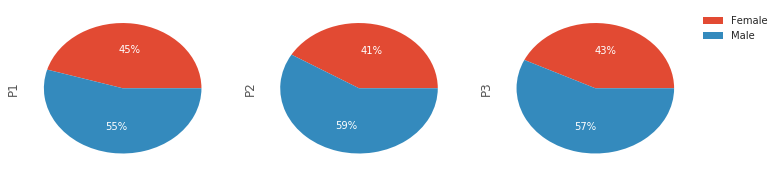

In [26]:
gender_df = pd.crosstab(people_df.gender, people_df.grade)
gender_df.plot.pie(subplots=True, figsize=(12,3), legend=False, labels=labels, 
                   autopct='%1.0f%%', textprops={'color':'white'})
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Age

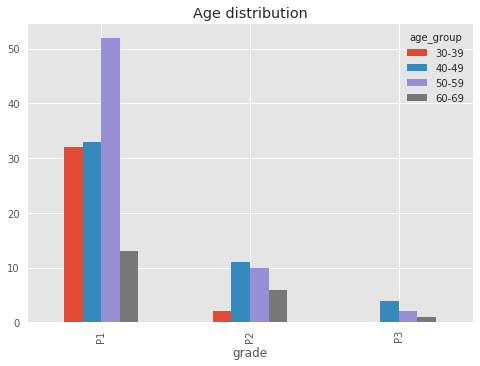

In [27]:
gender_df = people_df.pivot_table(index='grade', columns='age_group', values='headcount', aggfunc=np.sum)
gender_df.plot.bar();
plt.title('Age distribution');

### Working pattern

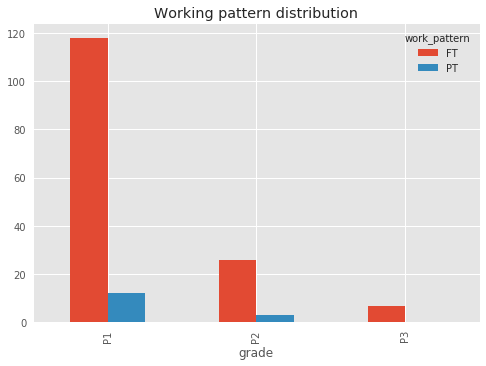

In [28]:
gender_df = people_df.pivot_table(index='grade', columns='work_pattern', values='headcount', aggfunc=np.sum)
gender_df.plot.bar();
plt.title('Working pattern distribution');

## Salary distribution

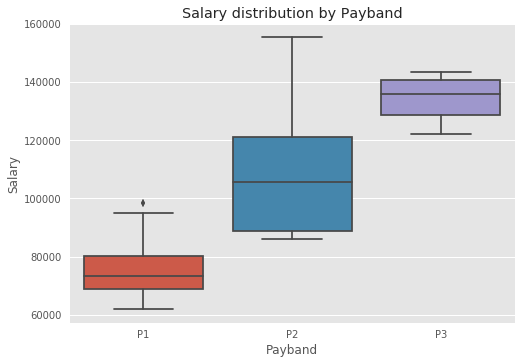

In [29]:
g = sns.boxplot(x='grade', y='salary', data=people_df)
g.set_xlabel('Payband')
g.set_ylabel('Salary')
g.set_title('Salary distribution by Payband')
plt.show(g)

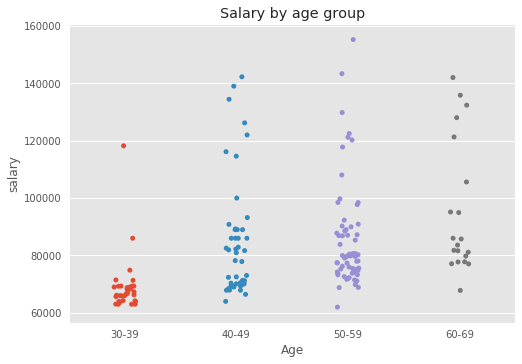

In [30]:
g = sns.stripplot(x='age_group', y='salary', data=people_df, jitter=True)
g.set_title('Salary by age group')
g.set_xlabel('Age')
plt.show(g)

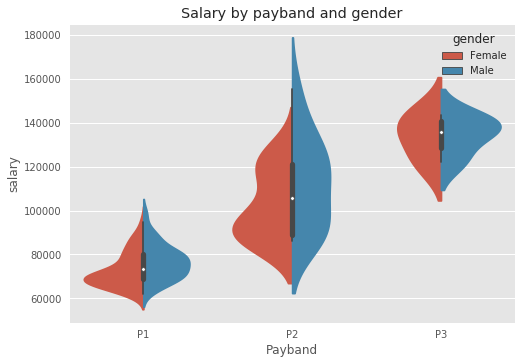

In [31]:
g = sns.violinplot(x='grade', y='salary', data=people_df, hue='gender', split=True)
g.set_title('Salary by payband and gender')
g.set_xlabel('Payband')
plt.show(g)